In [4]:
#attempt to improve the NN
#add the local and the global view construct coz transit false positive mismatch seems to be a major problem
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split

In [25]:
#network and training parameters:
BATCH_SIZE = 128
VERBOSE = 1 #no idea what this is but lets see...
VAL_SPLIT = 0.12 #how much of sample is reserved for validation

In [32]:
X_train=np.loadtxt('training_data/Xtrain_av_clean.csv',delimiter=',')
X_trainl=np.loadtxt('training_data/Xtrainloc_av_clean.csv',delimiter=',')
Y_train=np.loadtxt('training_data/Ytrain_av_clean.csv',delimiter=',')
#Ytrain_ref=np.loadtxt('training_data/YtrainR_big.csv',delimiter=',')
#Ytest_ref=np.loadtxt('training_data/YtestR_big.csv',delimiter=',')
Xtrain, Xtest, Xtrainl, Xtestl, Ytrain, Ytest = train_test_split(X_train, X_trainl, Y_train, test_size=0.1)
print(Xtrain.shape,Ytrain.shape,Xtest.shape,Ytest.shape)

(3220, 2000) (3220, 2) (358, 2000) (358, 2)


In [33]:
#got the training set ... now write the neural net
#buid the model
#SGD stochastic gradient descent... 
DROPOUT=0.3
IP=3220
TEST=358
np.random.seed(11223)
#clean data has 1805 FPS and 2117 planets

'''
conv_ip = keras.layers.Input(shape=(2000,),name='Input')
x=keras.layers.Reshape((2000, 1), input_shape=(2000,),name='reshape_1')(conv_ip)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Conv1D(16,kernel_size=5,strides=2,activation='relu',name='conv16_5')(x) 
x=keras.layers.Conv1D(16,kernel_size=5,strides=2,activation='relu',name='second_conv16_5')(x)
checkf=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_1')(x)
x=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='first_conv32_5')(checkf)
x=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='second_conv32_5')(x)
x=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_2')(x)
x=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu',name='conv64_5')(x)
x=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu',name='conv64_5_2')(x)
x=keras.layers.MaxPool1D(3,strides=3,data_format='channels_last',name='maxpool_3')(x)
x=keras.layers.Flatten(name='flat_1')(x)
x=keras.layers.Dense(16,name='dense_layer_1',activation='relu')(x)
conv_op=keras.layers.Dense(3,name='dense_layer_2',activation='softmax')(x)


convNN = keras.Model(inputs=conv_ip, outputs=conv_op,name='Convolutional_NN')

featuresNN = keras.Model(inputs=conv_ip, outputs=checkf)

convNN.summary()
convNN.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])'''

kernel_size = 5
kernel = np.ones(kernel_size) / kernel_size
Xtrain = [np.convolve(Xtrain[i], kernel, mode='same') for i in range(IP)]
Xtest = [np.convolve(Xtest[i], kernel, mode='same') for i in range(TEST)]

In [34]:

#add hidden layers
conv_ip = keras.layers.Input(shape=(2000,),name='Input')
conv_ipl = keras.layers.Input(shape=(200,),name='LInput')
x=keras.layers.Reshape((2000, 1), input_shape=(2000,),name='reshape_1')(conv_ip)
x=keras.layers.BatchNormalization()(x)
x=keras.layers.Conv1D(16,kernel_size=5,strides=1,activation='relu',name='conv16_5')(x) 
x=keras.layers.Conv1D(16,kernel_size=5,strides=1,activation='relu',name='second_conv16_5')(x)
x=keras.layers.MaxPool1D(5,strides=2,data_format='channels_last',name='maxpool_1')(x)
x=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='first_conv32_5')(x)
x=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='second_conv32_5')(x)
x=keras.layers.MaxPool1D(5,strides=2,data_format='channels_last',name='maxpool_2')(x)
x=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu',name='first_conv64_5')(x)
x=keras.layers.Conv1D(64,kernel_size=5,strides=1,activation='relu',name='second_conv64_5')(x)
x=keras.layers.MaxPool1D(5,strides=2,data_format='channels_last',name='maxpool_3')(x)
x=keras.layers.Conv1D(128,kernel_size=5,strides=1,activation='relu',name='first_conv128_5')(x)
x=keras.layers.Conv1D(128,kernel_size=5,strides=1,activation='relu',name='second_conv128_5')(x)
x=keras.layers.MaxPool1D(5,strides=2,data_format='channels_last',name='maxpool_4')(x)
#x=keras.layers.Conv1D(256,kernel_size=5,strides=1,activation='relu',name='first_conv256_5')(x)
#x=keras.layers.Conv1D(256,kernel_size=5,strides=1,activation='relu',name='second_conv256_5')(x)
#x=keras.layers.MaxPool1D(5,strides=2,data_format='channels_last',name='maxpool_5')(x)
x=keras.layers.Flatten(name='flat_1')(x)
x=keras.Model(conv_ip,x,name='global')

x2=keras.layers.Reshape((200, 1), input_shape=(200,),name='Lreshape_1')(conv_ipl)
x2=keras.layers.BatchNormalization()(x2)
x2=keras.layers.Conv1D(16,kernel_size=5,strides=1,activation='relu',name='Lconv16_5')(x2) 
x2=keras.layers.Conv1D(16,kernel_size=5,strides=1,activation='relu',name='Lsecond_conv16_5')(x2)
x2=keras.layers.MaxPool1D(5,strides=2,data_format='channels_last',name='Lmaxpool_1')(x2)
x2=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='Lfirst_conv32_5')(x2)
x2=keras.layers.Conv1D(32,kernel_size=5,strides=1,activation='relu',name='Lsecond_conv32_5')(x2)
x2=keras.layers.MaxPool1D(5,strides=2,data_format='channels_last',name='Lmaxpool_2')(x2)
x2=keras.layers.Flatten(name='flat_2')(x2)
x2=keras.Model(conv_ipl,x2,name='global')

x3=keras.layers.concatenate([x.output,x2.output],name="combine")

x3=keras.layers.Dense(512,name='dense_layer_1',activation='relu')(x3)
x3=keras.layers.Dense(512,name='dense_layer_2',activation='relu')(x3)
x3=keras.layers.Dense(512,name='dense_layer_3',activation='relu')(x3)
conv_op=keras.layers.Dense(2,name='dense_layer_4',activation='softmax')(x3)


convNN = keras.Model(inputs=[conv_ip,conv_ipl], outputs=conv_op,name='Convolutional_NN')


convNN.summary()
convNN.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy',metrics=['accuracy'])

Model: "Convolutional_NN"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input (InputLayer)              [(None, 2000)]       0                                            
__________________________________________________________________________________________________
reshape_1 (Reshape)             (None, 2000, 1)      0           Input[0][0]                      
__________________________________________________________________________________________________
batch_normalization_13 (BatchNo (None, 2000, 1)      4           reshape_1[0][0]                  
__________________________________________________________________________________________________
conv16_5 (Conv1D)               (None, 1996, 16)     96          batch_normalization_13[0][0]     
___________________________________________________________________________________

In [45]:
es_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history=convNN.fit([np.array(Xtrain),np.array(Xtrainl)],np.array(Ytrain), batch_size=64, epochs=40, verbose=VERBOSE, validation_split=0.12,callbacks=[es_callback])

Epoch 1/40
45/45 [==============================] - 28s 619ms/step - loss: 0.1973 - accuracy: 0.9227 - val_loss: 0.3843 - val_accuracy: 0.8811
Epoch 2/40
45/45 [==============================] - 24s 542ms/step - loss: 0.1847 - accuracy: 0.9223 - val_loss: 0.4120 - val_accuracy: 0.8863
Epoch 3/40
45/45 [==============================] - 24s 540ms/step - loss: 0.1590 - accuracy: 0.9386 - val_loss: 0.4815 - val_accuracy: 0.8708
Epoch 4/40
45/45 [==============================] - 28s 607ms/step - loss: 0.1550 - accuracy: 0.9361 - val_loss: 0.5243 - val_accuracy: 0.8786
Epoch 5/40
45/45 [==============================] - 26s 588ms/step - loss: 0.1525 - accuracy: 0.9389 - val_loss: 0.4214 - val_accuracy: 0.8966
Epoch 6/40
45/45 [==============================] - 26s 588ms/step - loss: 0.1570 - accuracy: 0.9389 - val_loss: 0.5045 - val_accuracy: 0.8734
Epoch 7/40
45/45 [==============================] - 26s 584ms/step - loss: 0.1722 - accuracy: 0.9269 - val_loss: 0.4571 - val_accuracy: 0.8811

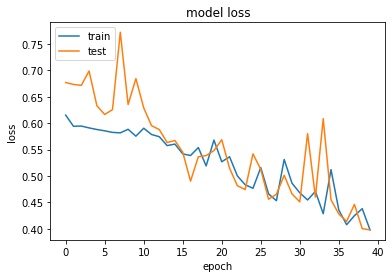

In [39]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('Mloss_SandN_l.png')
plt.show()

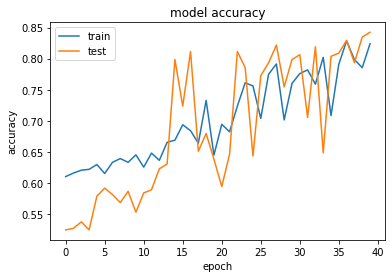

In [40]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig('macc_SandN_l.png')
plt.show()

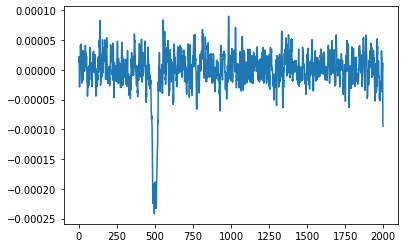

In [9]:
#testing the feature map
#Y=featuresNN.predict(np.array(Xtrain[:10]))
#sep=[[Y[i][j][1] for i in range(10)] for j in range(7)]
#plt.imshow(sep)
plt.plot(Xtrain[4])
#[plt.scatter(i,Y[0][i][2],color='green') for i in range(0,7)]
#[plt.scatter(i,Y[0][i][3],color='black') for i in range(0,7)]
plt.show()

In [50]:
test_loss, test_acc = convNN.evaluate([np.array(Xtrain),np.array(Xtrainl)], np.array(Ytrain))
print('Test accuracy:', test_acc)
Ypred_raw=convNN.predict([np.array(Xtrain),np.array(Xtrainl)])
Ypred=np.argmax(Ypred_raw, axis=1)
Ytest_new=np.argmax(Ytrain,axis=1)
cm = confusion_matrix(Ytest_new, Ypred)
print(cm)

101/101 [==============================] - 8s 74ms/step - loss: 0.1601 - accuracy: 0.9512
Test accuracy: 0.951242208480835


ValueError: Found input variables with inconsistent numbers of samples: [358, 3220]

In [49]:
convNN.save_weights('conv_LocalGlobal.h5')